In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from collections import defaultdict
import os
import seaborn as sns
import scipy 
from functools import reduce
import sys


file_dirname = os.path.dirname(os.path.abspath('__file__'))
sys.path.insert(1,os.path.join(file_dirname,'src','statistics'))


from module_analysis_transposon_sites import (frequency_transposons,reads_per_transposon, transposon_density,
                                            median_feature_essentials,median_feature_nonessentials,filter_low_and_biased_reads_genes,
                                            reads_distribution_per_gene)

ModuleNotFoundError: No module named 'module_analysis_transposon_sites'

In [83]:
#%% Import of dataframes output from the SATAY pipeline


names_libraries={'wt':'data_wt_merged.xlsx','dnrp1':'data_dnrp1_merged.xlsx'}
data_library=[]
for i in names_libraries.keys():
 data_library.append(pd.read_excel(file_dirname+'/../../datasets/'+names_libraries[i],index_col='Unnamed: 0',engine='openpyxl'))


In [84]:
#%% Removing the ADE2 and URA3 gene reads and insertions from the population

for i in np.arange(0,len(data_library)):
    data_library[i]=data_library[i][data_library[i].Standard_name != 'ADE2']
    data_library[i]=data_library[i][data_library[i].Standard_name != 'URA3']

data_library_pd=pd.concat(data_library,keys=names_libraries.keys(),sort=True)
data_library_pd.fillna(0,inplace=True)

In [85]:

measures_satay=defaultdict(dict)

for keys in names_libraries.keys():
    measures_satay[keys]["bp_per_tr"]=frequency_transposons(data_library_pd.loc[keys])
    measures_satay[keys]["reads_per_tr"]=reads_per_transposon(data_library_pd.loc[keys])
    measures_satay[keys]["tr_pr_100bp"]=100*transposon_density(data_library_pd.loc[keys])
    measures_satay[keys]["tr_essentials_median"]=median_feature_essentials(data_library_pd.loc[keys],feature="Ninsertions")
    measures_satay[keys]["tr_nonessentials_median"]=median_feature_nonessentials(data_library_pd.loc[keys],feature="Ninsertions")
    measures_satay[keys]["reads_per_tr_essentials"]=median_feature_essentials(data_library_pd.loc[keys],feature="Nreadsperinsrt")
    measures_satay[keys]["reads_per_tr_nonessentials"]=median_feature_nonessentials(data_library_pd.loc[keys],feature="Nreadsperinsrt")

measures_satay_pd=pd.DataFrame(measures_satay)
measures_satay_pd

There are, in average 4.1387178564499365 transposons per each 100 basepairs
There are, in average 7.72628379353174 transposons per each 100 basepairs


,wt,dnrp1
bp_per_tr,24.162072,12.942833
reads_per_tr,75.231884,78.672414
tr_pr_100bp,4.138718,7.726284
tr_essentials_median,18.000000,28.000000
tr_nonessentials_median,24.000000,47.000000
reads_per_tr_essentials,41.709330,62.531250
reads_per_tr_nonessentials,79.500000,81.000000


In [142]:
data_wt=data_library_pd.loc['wt'].copy()
data_nrp1=data_library_pd.loc['dnrp1'].copy()

####### Transposon density vs genes ####################

data_nrp1['tr-density']=data_nrp1['Ninsertions']/data_nrp1['Nbasepairs']
data_wt['tr-density']=data_wt['Ninsertions']/data_wt['Nbasepairs']
data_nrp1['reads-density']=data_nrp1['Nreads']/data_nrp1['Nbasepairs']
data_wt['reads-density']=data_wt['Nreads']/data_wt['Nbasepairs']


In [89]:
### Filtering data to compute median_feature_nonessentials

data_filter_wt=filter_low_and_biased_reads_genes(data_wt)
data_filter_dnrp1=filter_low_and_biased_reads_genes(data_nrp1)

data_filter_dnrp1.fillna(0,inplace=True)
data_filter_wt.fillna(0,inplace=True)

data_filter_wt.index=data_wt['Standard_name']
data_filter_dnrp1.index=data_nrp1["Standard_name"]

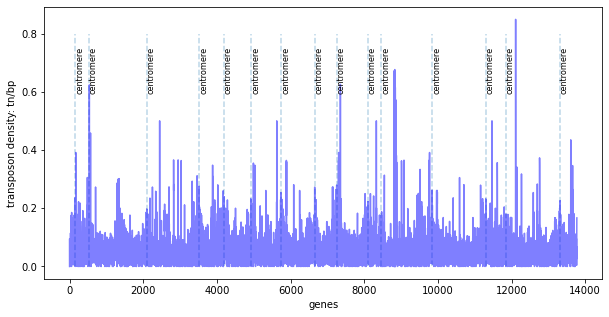

In [150]:
#%% Plot transposon density (fig 1B Benoit) highlighting the centromere position

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(data_wt['tr-density'],alpha=0.5,color='b')
ax.set_ylabel('transposon density: tn/bp')
ax.set_xlabel('genes')

## annotated centromeres
for i in  data_wt.index:
    
    if data_wt.loc[i,'Feature_type']=='Centromere': 
   
        ax.vlines(x=i,ymin=0,ymax=0.8,linestyles='--',alpha=0.3)
        ax.text(x=i,y=0.6,s='centromere',rotation=90,fontsize=8)

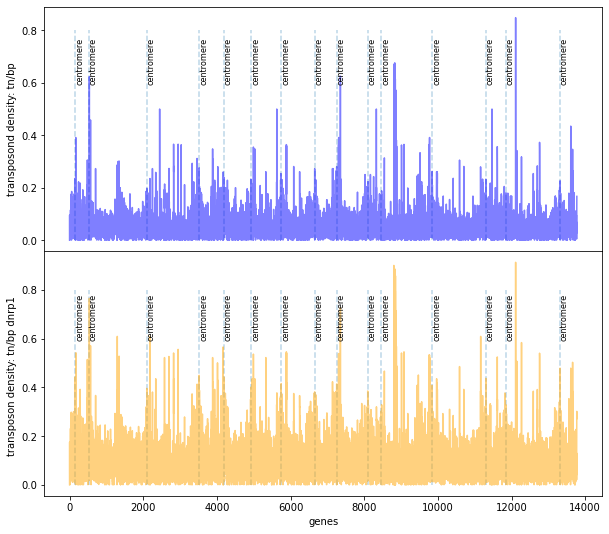

In [151]:
#%% Transposon density for comparing two libraries
fig=plt.figure(figsize=(10,9))
grid = plt.GridSpec(2, 1, wspace=0.0, hspace=0.0)
ax = plt.subplot(grid[0,0])
ax2 = plt.subplot(grid[1,0])   

ax.plot(data_wt['tr-density'],alpha=0.5,color='b')
ax.set_ylabel('transposond density: tn/bp')

## annotated centromeres
for i in data_wt.index:
    
    if data_wt.loc[i,'Feature_type']=='Centromere': 
   
        ax.vlines(x=i,ymin=0,ymax=0.8,linestyles='--',alpha=0.3)
        ax.text(x=i,y=0.6,s='centromere',rotation=90,fontsize=8)

ax2.plot(data_nrp1['tr-density'],alpha=0.5,color='orange')
ax2.set_ylabel('transposon density: tn/bp dnrp1 ')
ax2.set_xlabel('genes')
## annotated centromeres
for i in data_nrp1.index:
    
    if data_nrp1.loc[i,'Feature_type']=='Centromere': 
   
        ax2.vlines(x=i,ymin=0,ymax=0.8,linestyles='--',alpha=0.3)
        ax2.text(x=i,y=0.6,s='centromere',rotation=90,fontsize=8)
